## **Final Project 1: Linear Regression**

This project was created to fulfill the assignment of The Introduction of Python for Data Science Course

### **Our Members** ###

- Caesariansyah Dwi Fadhilah
- Muhammad Reza Pahlevi

## **A. Introduction**

In this era, many people choose to use ride-hailing services because it allows users to utilize their travel time for other activities. This trend became the background for the formation of Uber and Lyft. Uber and Lyft are companies that provide transportation services through mobile applications. Since the pricing structure of both platforms is dynamic, an analysis was conducted to identify and predict the factors that influence these fluctuations, which was achieved through linear regression.

To facilitate this investigation, a dataset sourced from Kaggle was used, which contains information extracted from the Uber and Lyft apps. This dataset consists of 693,071 rows and 57 columns. The model developed for this project will be implemented using Streamlit.

The dataset used is a good dataset for linear regression modeling to observe patterns in the features that have the most influence on Uber and Lyft pricing. We formulate a problem regarding the most significant factors affecting Uber and Lyft pricing. In this case, we use correlation analysis, where low correlations are eliminated to achieve more accurate predictions.

## **B. Import Libraries**

The libraries needed to bulid a linear regression model include numpy, pandas, sympy, seaborn, matplotlib, dython nominal, joblib, and sklearn.

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from dython.nominal import associations
from joblib import dump
import pickle

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## **C. Data Loading**

Import *rideshare_kagle.csv* as *df*. So, the required dataset will be read by the program.

In [2]:
df = pd.read_csv("rideshare_kaggle.csv")

Display the data that has been imported

In [3]:
pd.set_option("display.max.columns", None)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Summarize the information about DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Summarize the descriptive statistics from DataFrame

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


Describe specific of statistics to object columns

In [6]:
df.describe(include='object').T

,count,unique,top,freq
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,693071,31350,2018-11-26 23:21:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


In [7]:
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

## **D. Data Cleaning**

### **Irrelevant Feauture**

There are some columns irrelevant. So remove the following features, such as:
- *id*: It's unique for every row
- *datetime*: It's already been represented by hour, day, and month columns
- *timestamp*: It's similar to datetime column
- *timezone*: There's only one timezone within the dataframe

In [8]:
df = df.drop(['id','timestamp','datetime','timezone'],axis=1)

#### **Drop Duplicate Rows**

In [9]:
df.duplicated().sum()

78063

In [10]:
df.drop_duplicates(inplace=True)

#### **Check Missing Values**

In [11]:
df.isnull().sum()

hour                               0
day                                0
month                              0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          32942
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
temperatureLow                     0
t

There are *NaN* values in the price column, since price is our target, so we will drop the rows with *NaN* values in the price column.

In [12]:
df = df.dropna(subset = "price")

## **E. Exploratory Data Analysis**

Analyze and visualize the distribution of ride costs on each name

c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

Text(0.5, 1.0, 'Distribution of Ride Costs')

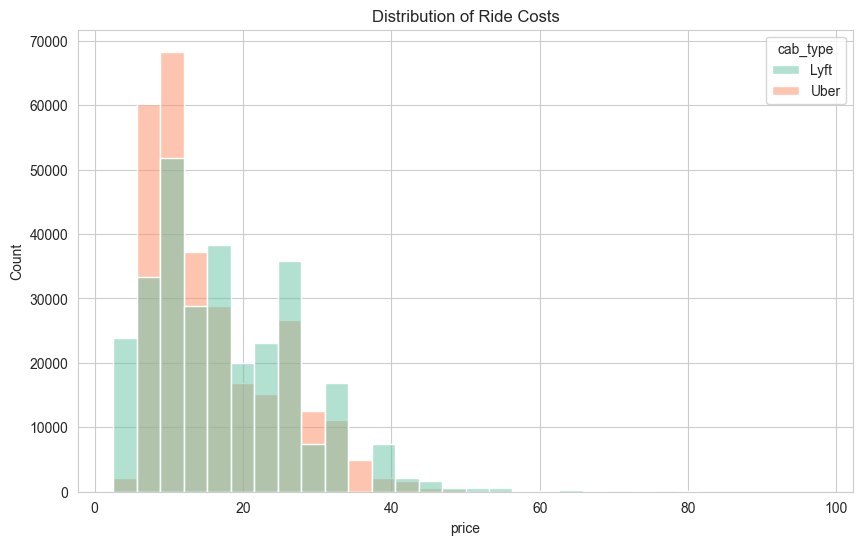

In [13]:
#PLOT HISTOGRAM OF price WITH CAB TYPE AS HUE
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='price',hue='cab_type',bins=30)
plt.title("Distribution of Ride Costs")

From piechart above, it can be concluded that Black SUV type is more ordered in Uber with a total of order is 26.36%, and the least oredered in Uber is UberPool with a total of order is 7.97%. Meanwhile, the most ordered at Lyft is Lux Black XL with a total of order is 27.91%, and the least ordered is Shared with a total of order is 6.14%

#### **Which One is More Popular?** ###

c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Popularity between Uber and Lyft')

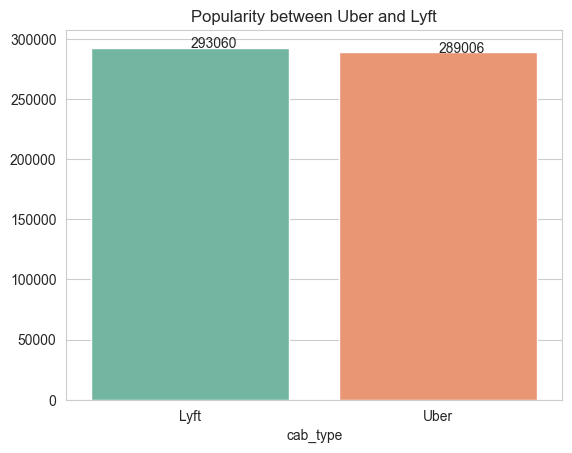

In [15]:
# Membuat variabel df_transport_name berisi total data dari kolom transport_name
sns.barplot(x=df['cab_type'].value_counts().index,y=df['cab_type'].value_counts().values)
# get label in each bar
for i in range(len(df['cab_type'].value_counts().index)):
    plt.text(x=i,y=df['cab_type'].value_counts().values[i],s=df['cab_type'].value_counts().values[i])

plt.title("Popularity between Uber and Lyft")

From the barchart above, we can see if Uber is more popular than Lyft, with a total of 293.060 passangers and Lyft with a total of 289006 passangers.

#### **Place with Most Pick-Ups (Source and Destination)** ###

c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Most Pick-Up Points')

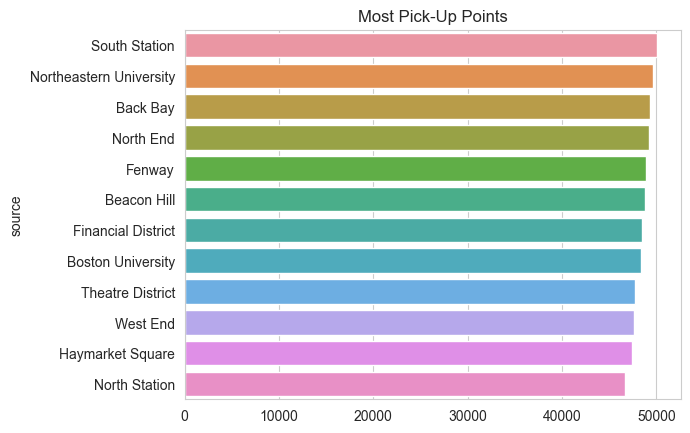

In [16]:
#horizontal barplot for source
sns.barplot(y=df['source'].value_counts().index,x=df['source'].value_counts().values)
plt.title("Most Pick-Up Points")

It can be seen from the barplot above that South Station has the most pick-up points.

c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Most Drop-Off Points')

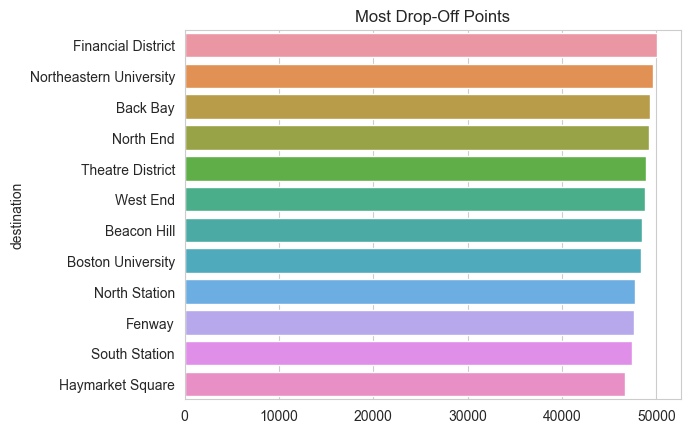

In [17]:
sns.barplot(y=df['destination'].value_counts().index,x=df['source'].value_counts().values)
plt.title("Most Drop-Off Points")

It can be seen from the barplot above that Back Bay is the most drop-off point

#### **How Distances Affect Price** 

c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

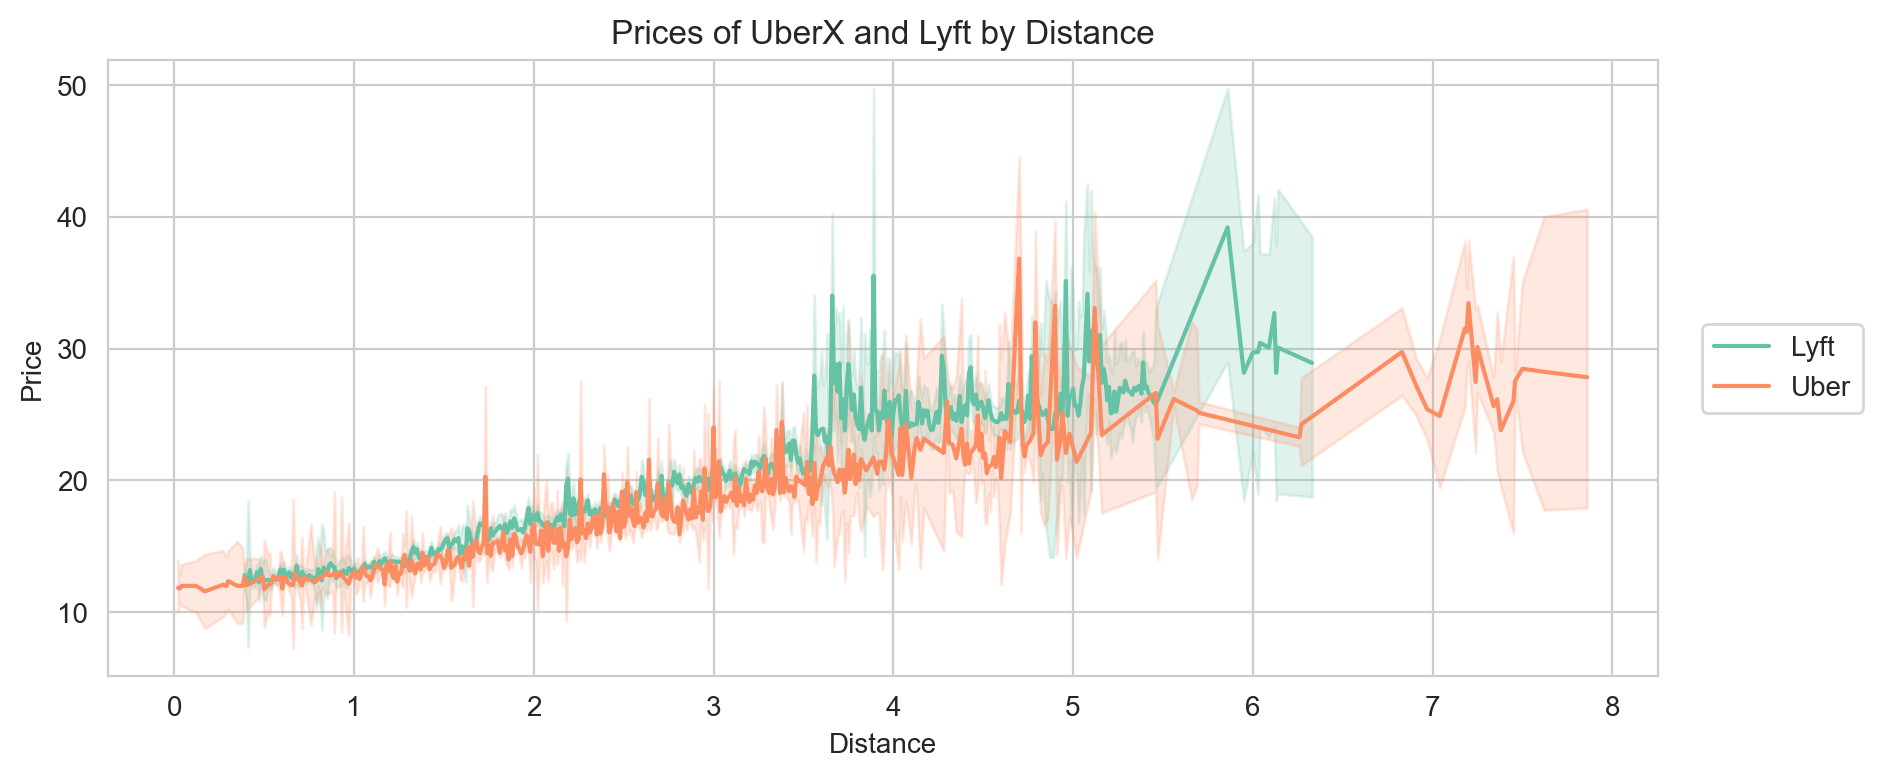

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.lineplot(data=df,x="distance",y="price",hue="cab_type")
plt.title("Prices of UberX and Lyft by Distance")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left")
plt.show()

Based on the graph above, it can be seen that the greater the distance traveled by Uber and Lyft, the greater the fare. Lyft has a higher fare than Uber even though the distance traveled is less than Uber. This means that there is a correlation between the distance traveled and the fare.

#### **Correlation Plot**

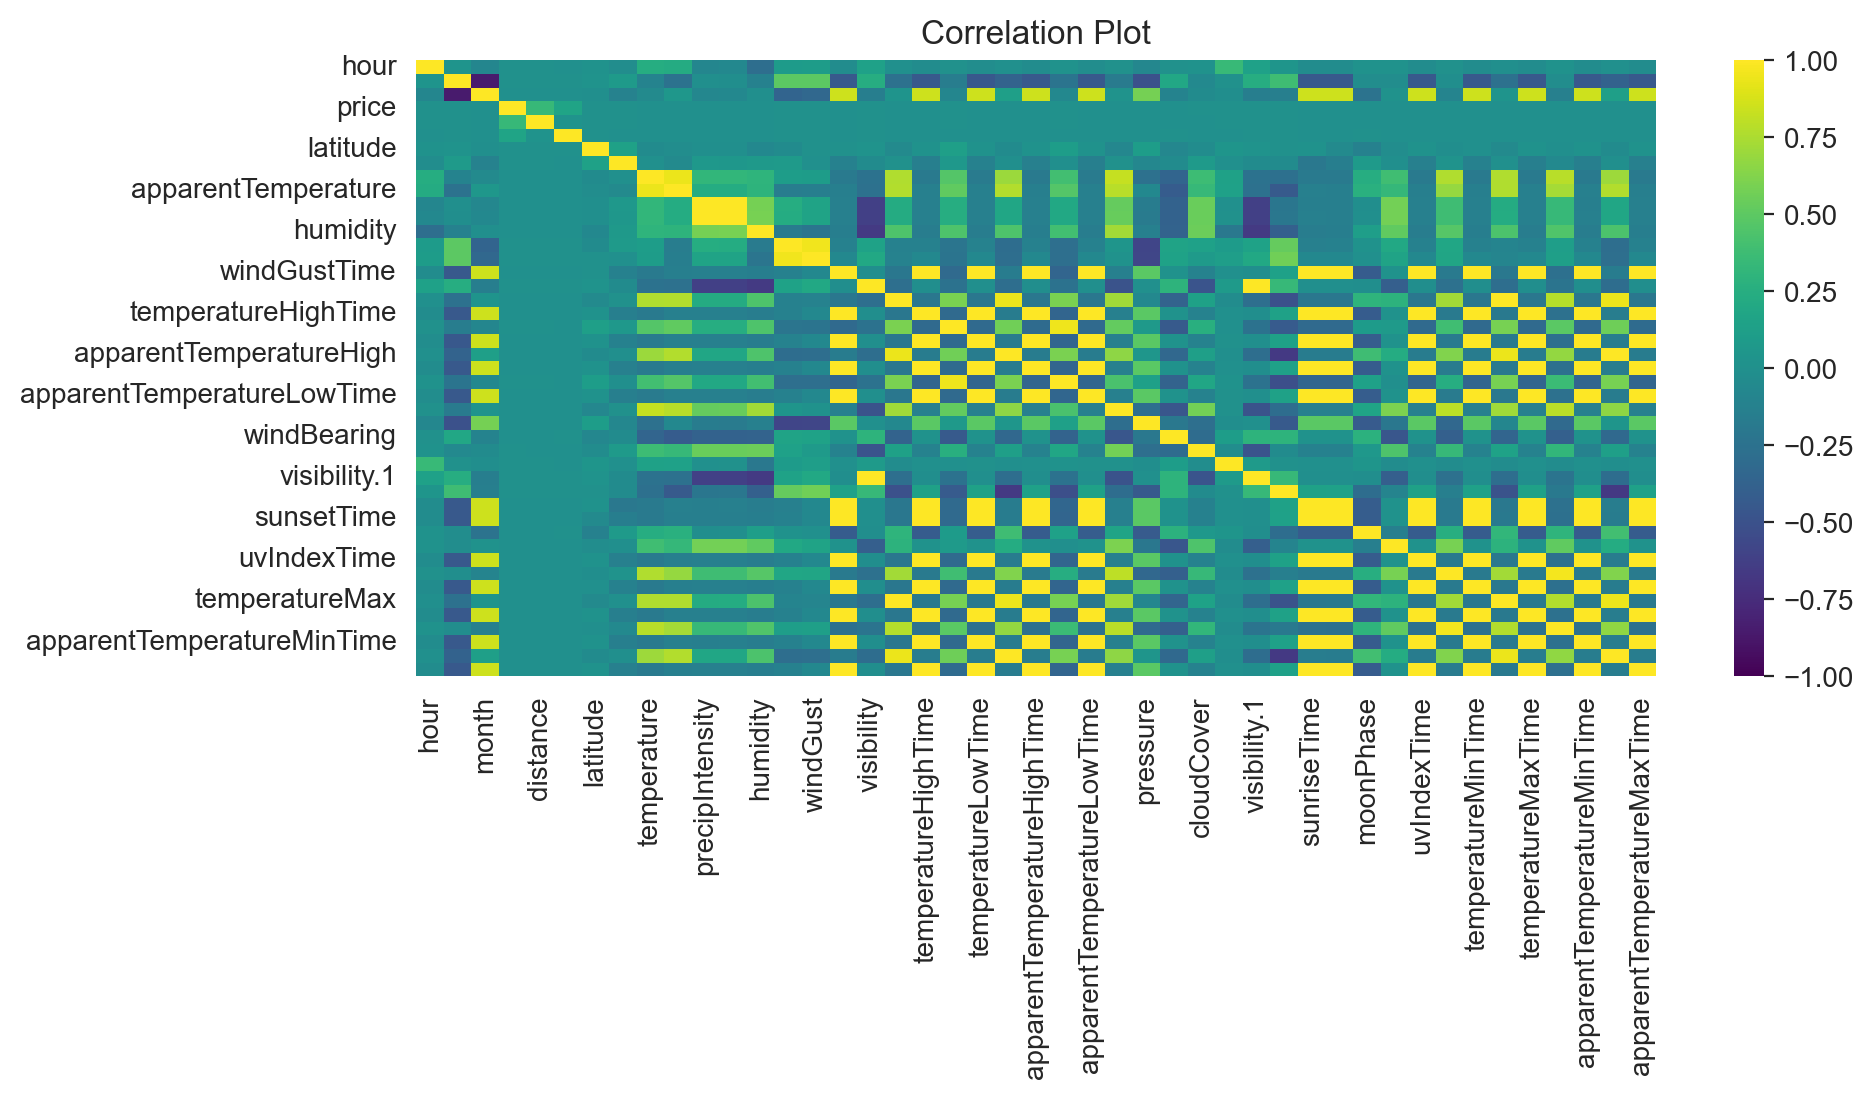

In [19]:
plt.figure(figsize=(10,4),dpi=200)
cat_col = df.select_dtypes(include='object').columns.tolist()
num_col = df.select_dtypes(exclude='object').columns.tolist()
#disable annotation
sns.heatmap(df[num_col].corr('spearman'),annot=False,cmap='viridis',vmax=1,vmin=-1)
plt.title("Correlation Plot")
#disable annotatio
plt.show()

some feature have high correlation with each other, we will drop the faeture that has high correlation with other feature

In [20]:
#drop feature that has high correlation 95%
def drop_corr(data,threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

high_corr_col = drop_corr(df[num_col],0.95)
len(high_corr_col)

16

In [21]:
high_corr_col

{'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLowTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'sunriseTime',
 'sunsetTime',
 'temperatureHighTime',
 'temperatureLowTime',
 'temperatureMax',
 'temperatureMaxTime',
 'temperatureMinTime',
 'uvIndexTime',
 'visibility.1'}

## **F. Data Pre-Processing**

### **Train Test Split**

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(['price'],axis=1)
y = df['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((407446, 52), (174620, 52), (407446,), (174620,))

for ease and efficiency in preprocessing data, we will use pipeline to do it. this preprocessing consist of:
1. Imputing missing value using median for numerical data and mode for categorical data
2. Transformation using Standar Scaler for numerical data, and Target Encoding for categorical data

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder,PowerTransformer
from sklearn.impute import SimpleImputer


#define new list for numerical columns and categorical columns
num_col = X_train.select_dtypes(exclude='object').columns.tolist()
cat_col = X_train.select_dtypes(include='object').columns.tolist()
num_col = [col for col in num_col if col not in high_corr_col]
cat_col = [col for col in cat_col if col not in high_corr_col]

num_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',TargetEncoder(random_state=42))
])

preprocessor = ColumnTransformer([
    ('numeric',num_pipe,num_col),
    ('categoric',cat_pipe,cat_col)
])

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['hour', 'day', 'month', 'distance',
                                  'surge_multiplier', 'latitude', 'longitude',
                                  'temperature', 'apparentTemperature',
                                  'precipIntensity', 'precipProbability',
                                  'humidity', 'windSpeed', 'windGust',
                                  'windGustTime', 'visibility',
                                  'temperatureHigh', 'tem...
                                  'apparentTemperatureLow', 'dewPoint',
                                  'pressure', 'windBearing', 'cloudCover',
                                  'uvIndex', 'ozone', 'moonPhase',
                                  'precipIntensityMax', 'temperatureMin']),
                                ('categoric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  TargetEncoder(random_state=42))]),
                                 ['source', 'destination', 'cab_type',
                                  'product_id', 'name', 'short_summary',
                                  'long_summary', 'icon'])])

In [24]:
preprocessor.fit_transform(X_train,y_train)

array([[ 0.19891719, -1.665012  ,  0.82222659, ..., 16.84176559,
        16.75439422, 16.81812484],
       [-0.23344035,  0.9397455 , -1.21620975, ..., 16.75337991,
        16.8170272 , 16.71558217],
       [-1.24227461, -1.46464604,  0.82222659, ..., 16.74130506,
        16.79040578, 16.74130506],
       ...,
       [ 1.20775146, -1.56482902,  0.82222659, ..., 16.65981318,
        16.63925872, 16.7541561 ],
       [-1.09815543, -0.16226729,  0.82222659, ..., 16.72197893,
        16.8048171 , 16.69785411],
       [ 0.9195131 ,  1.03992848, -1.21620975, ..., 16.74130506,
        16.7820634 , 16.74130506]])

## **G. Model Definition and Training**

Let's try to create and train basic linear regression model

In [25]:
# Create and train basic linear regression model first
from sklearn.linear_model import LinearRegression

base_model = Pipeline([
    ('preprocess',preprocessor),
    ('base_model',LinearRegression())
])

base_model.fit(X_train,y_train)
base_pred = base_model.predict(X_test)

# Evaluate all the models with more details using other metrics in the next section
from sklearn.metrics import r2_score

r2_score(y_test,base_pred) 

0.925968044668805

#### **Polynomial Regression ($d=2$)**

In [26]:
# Transform independent variable for polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

poly_2_model = Pipeline([
    ('preprocess',preprocessor),
    ('poly',PolynomialFeatures(degree=2,include_bias=False)),
    ('model',LinearRegression())
])

poly_2_model.fit(X_train,y_train)
# Predict the price and it will be seen by the values of R-Square
poly_2_pred = poly_2_model.predict(X_test)
r2_score(y_test,poly_2_pred)

0.9542472153573868

## **H. Models Evaluation**

Evaluate the models using metrics as follows:
- $ MAE = \frac{1}{n}\sum\limits_{i=1}^n |y_{i} - \hat{y}_{i}| $
- $ RMSE = \sqrt{\frac{1}{n}\sum\limits_{i=1}^n (y_{i} - \hat{y}_{i})^2} $
- $ R^2 = 1 - \frac{\sum(y_{i} - \hat{y}_{i})^2}{\sum(y_{i} - \bar{y}_{i})^2} $

c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

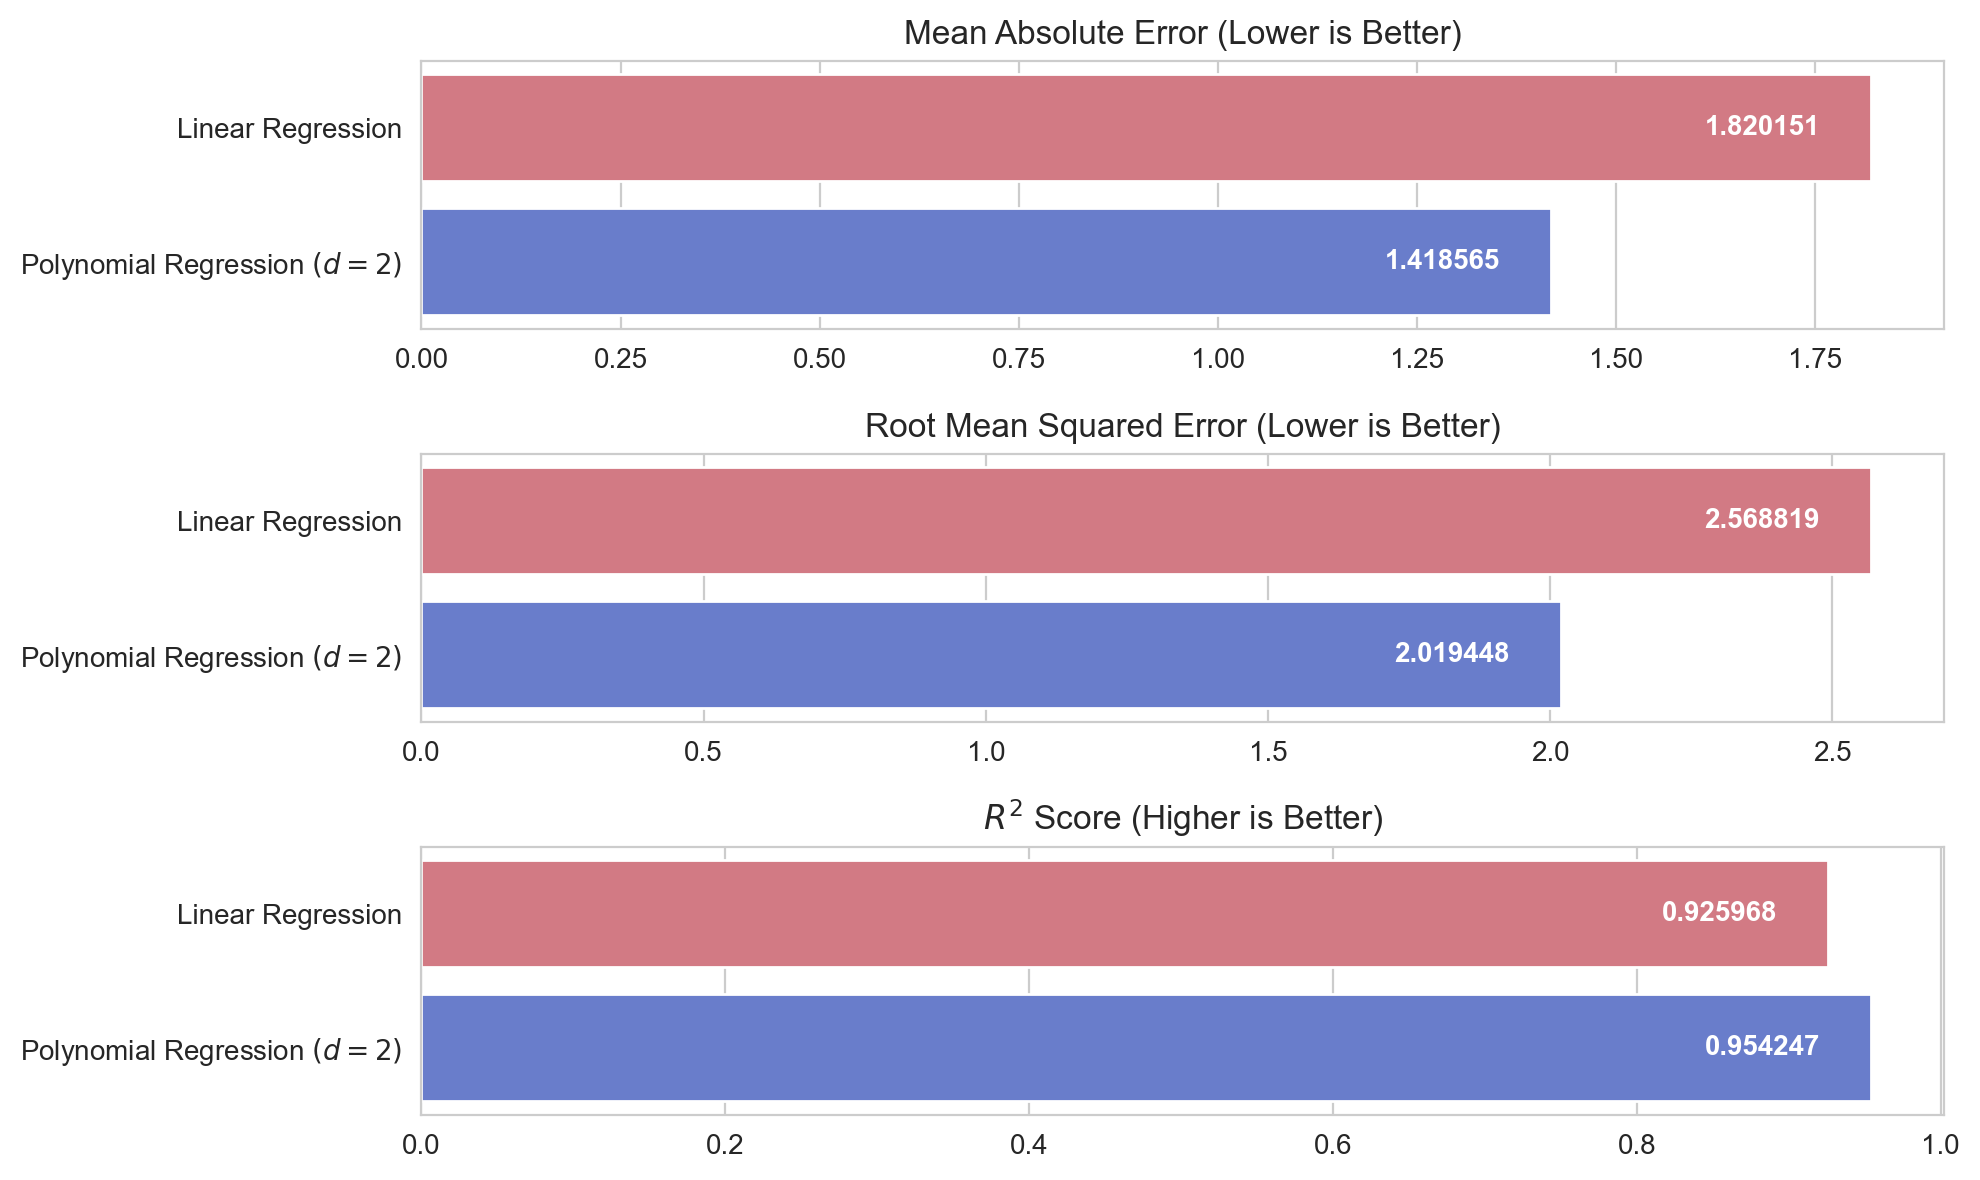

In [27]:
fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=3,ncols=1)

barplot = sns.barplot(
    x=[mean_absolute_error(y_test,base_pred),mean_absolute_error(y_test,poly_2_pred)],
    y=["Linear Regression","Polynomial Regression $(d=2)$"],
    palette=["#E06C78","#5874DC"],
    ax=ax[0]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[0].set_title("Mean Absolute Error (Lower is Better)")

barplot = sns.barplot(
    x=[np.sqrt(mean_squared_error(y_test,base_pred)),np.sqrt(mean_squared_error(y_test,poly_2_pred))],
    y=["Linear Regression","Polynomial Regression $(d=2)$"],
    palette=["#E06C78","#5874DC"],
    ax=ax[1]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[1].set_title("Root Mean Squared Error (Lower is Better)")

barplot = sns.barplot(
    x=[r2_score(y_test,base_pred),r2_score(y_test,poly_2_pred)],
    y=["Linear Regression","Polynomial Regression $(d=2)$"],
    palette=["#E06C78","#5874DC"],
    ax=ax[2]
)
for i in barplot.containers:
    barplot.bar_label(i,fmt="%.6f",padding=-60,color="white",fontweight="bold")
ax[2].set_title("$ R^{2} $ Score (Higher is Better)")

plt.tight_layout()
plt.show()

Based on the plot above, we can see that polynomial regression model ($d=2$) is best model because it has lowest value for MAE and RMSE and highest score of ($R^2$) 

Reference: [Stack Overflow](https://stackoverflow.com/questions/52404857/how-do-i-plot-for-multiple-linear-regression-model-using-matplotlib)

c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

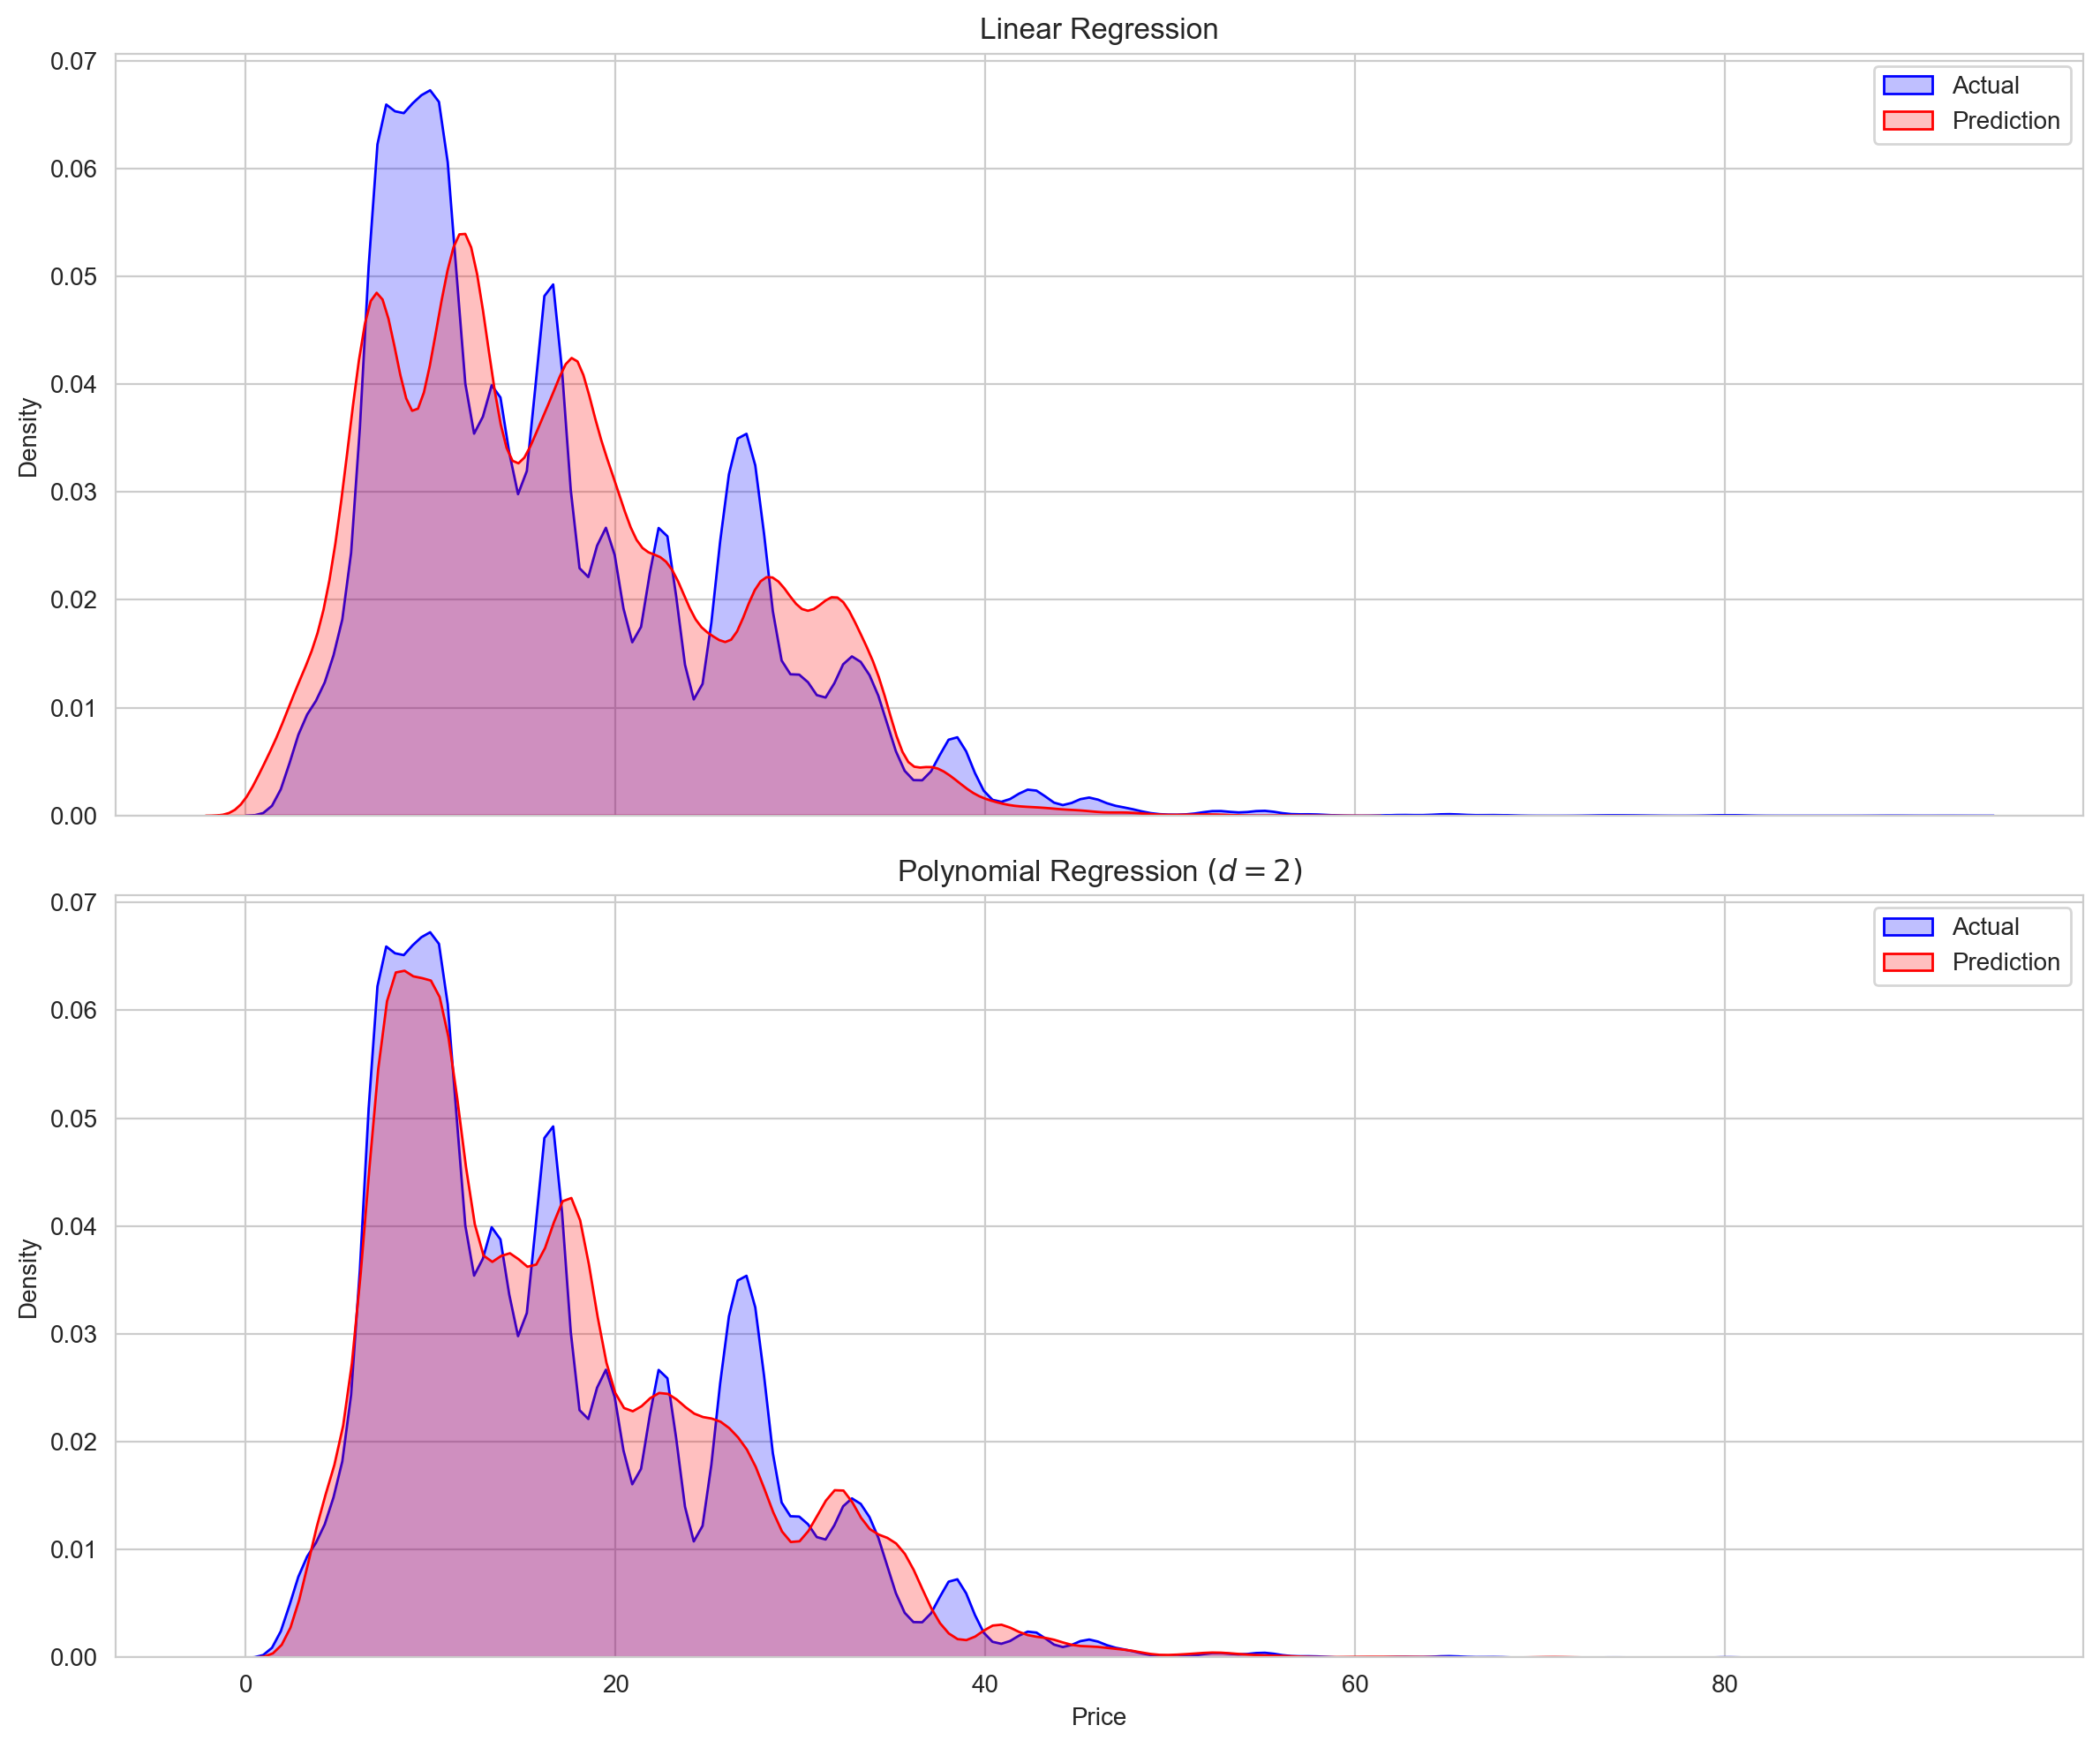

In [28]:
fig,ax = plt.subplots(figsize=(12,10),dpi=200,nrows=2,ncols=1,sharex=True)

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[0])
sns.kdeplot(base_pred,color="red",fill=True,label="Prediction",ax=ax[0])
ax[0].set_title("Linear Regression")
ax[0].set_xlabel("Price")
ax[0].legend(loc="upper right")

sns.kdeplot(y_test,color="blue",fill=True,label="Actual",ax=ax[1])
sns.kdeplot(poly_2_pred,color="red",fill=True,label="Prediction",ax=ax[1])
ax[1].set_title("Polynomial Regression $(d=2)$")
ax[1].set_xlabel("Price")
ax[1].legend(loc="upper right")

plt.tight_layout()
plt.show()

Based on plot above, it can be see that polynomial regression ($d=2$) is the best model because of the most accurate prediction

Put all of the predictions in a single dataframe to see the numbers clearly.

In [29]:
pd.DataFrame({
    "Actual":y_test,
    "Linear Regression Prediction":base_pred,
    "Polynomial Regression (d = 2) Prediction":poly_2_pred,
}).reset_index(drop=True)

,Actual,Linear Regression Prediction,Polynomial Regression (d = 2) Prediction
0,22.5,19.052660,19.074707
1,16.5,28.119799,18.815772
2,27.5,33.482836,27.325394
3,52.5,44.221117,55.835574
4,16.0,18.624681,18.245112
...,...,...,...
174615,26.0,25.149828,25.647082
174616,22.5,22.237230,21.826196
174617,15.0,13.372728,13.543988
174618,26.0,29.216723,27.327556


After all of the models have been evaluated, it's time to create the final models by retraining them with the whole dataframe. Let's start with the basic linear regression one and write its equation.

Save all the final models for future use.

In [30]:
#save model to pickle
pickle.dump(base_model,open("base_model.pkl","wb"))
pickle.dump(poly_2_model,open("poly_2_model.pkl","wb"))

## **I. Conclusion**

Based on the analysis above, it can be concluded that the best model to predict the prices of Uber and Lyft transportation services is polynomial regression where ($d=2$) since it has the lowest MAE and RMSE and highest score among other models. In addition, its prediction is close to the actual prices.